**BILO BAGE BILIYAN DA KI KAREGI BAGE BAGE BILIYAN DA KI KAREGI**
<BR>ANS: *** *********

**Add all imports here**
**DEKH LENA SAARE IMPORTS SAARE YAHAN DAALNE HAIN VVVVVVVVVVVVVIMP**

In [3]:
import numpy as np
import pandas as pd
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor

# **Loading the dataset**

In [4]:
uploaded = files.upload()
data = pd.read_csv("cardio_train.csv")
data.drop("id",axis=1,inplace=True)

In [5]:
display(data)

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69995  19240       2     168    76.0    120     80            1     1      1   
69996  22601       1     158   126.0    140     90            2     2      0   
69997  19066       2     183   105.0    180     90            3     1      0   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  PP         MAP  cardio  
0         0       1  30   90.000000       0  
1         0       1  50  106.666667       1  
2         0       0  60   90.000000       1  
3         0       1  50  116.666667       1  
4         0       0  40   73.333333       0  
...     ...     ...  ..         ...     ...  
69995     0       1  40   93.333333       0  
69996     0       1  50  106.666667       1  
69997     1       0  90  120.000000       1  
69998     0       0  55   98.333333       1  
69999     0       1  40   93.333333       0  

[70000 rows x 14 columns]

# **Exploratory Data Analysis**

**Multi-variate Analysis**

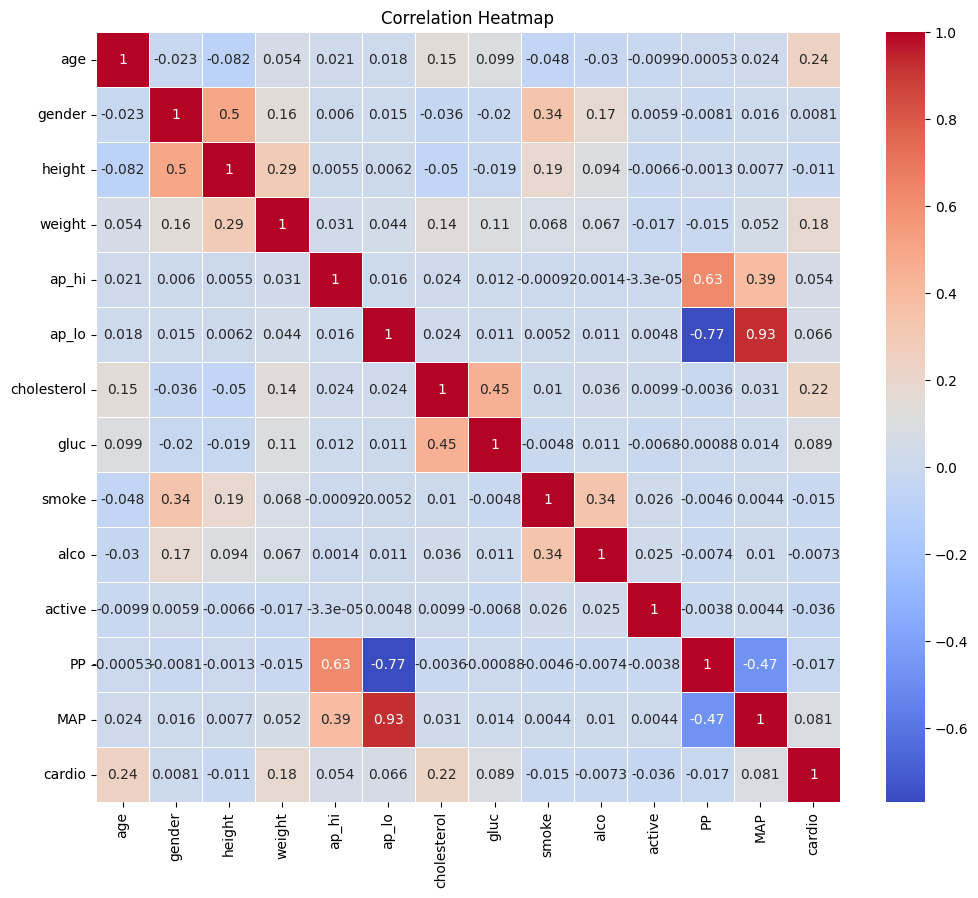

In [6]:
# Corelation HeatMap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


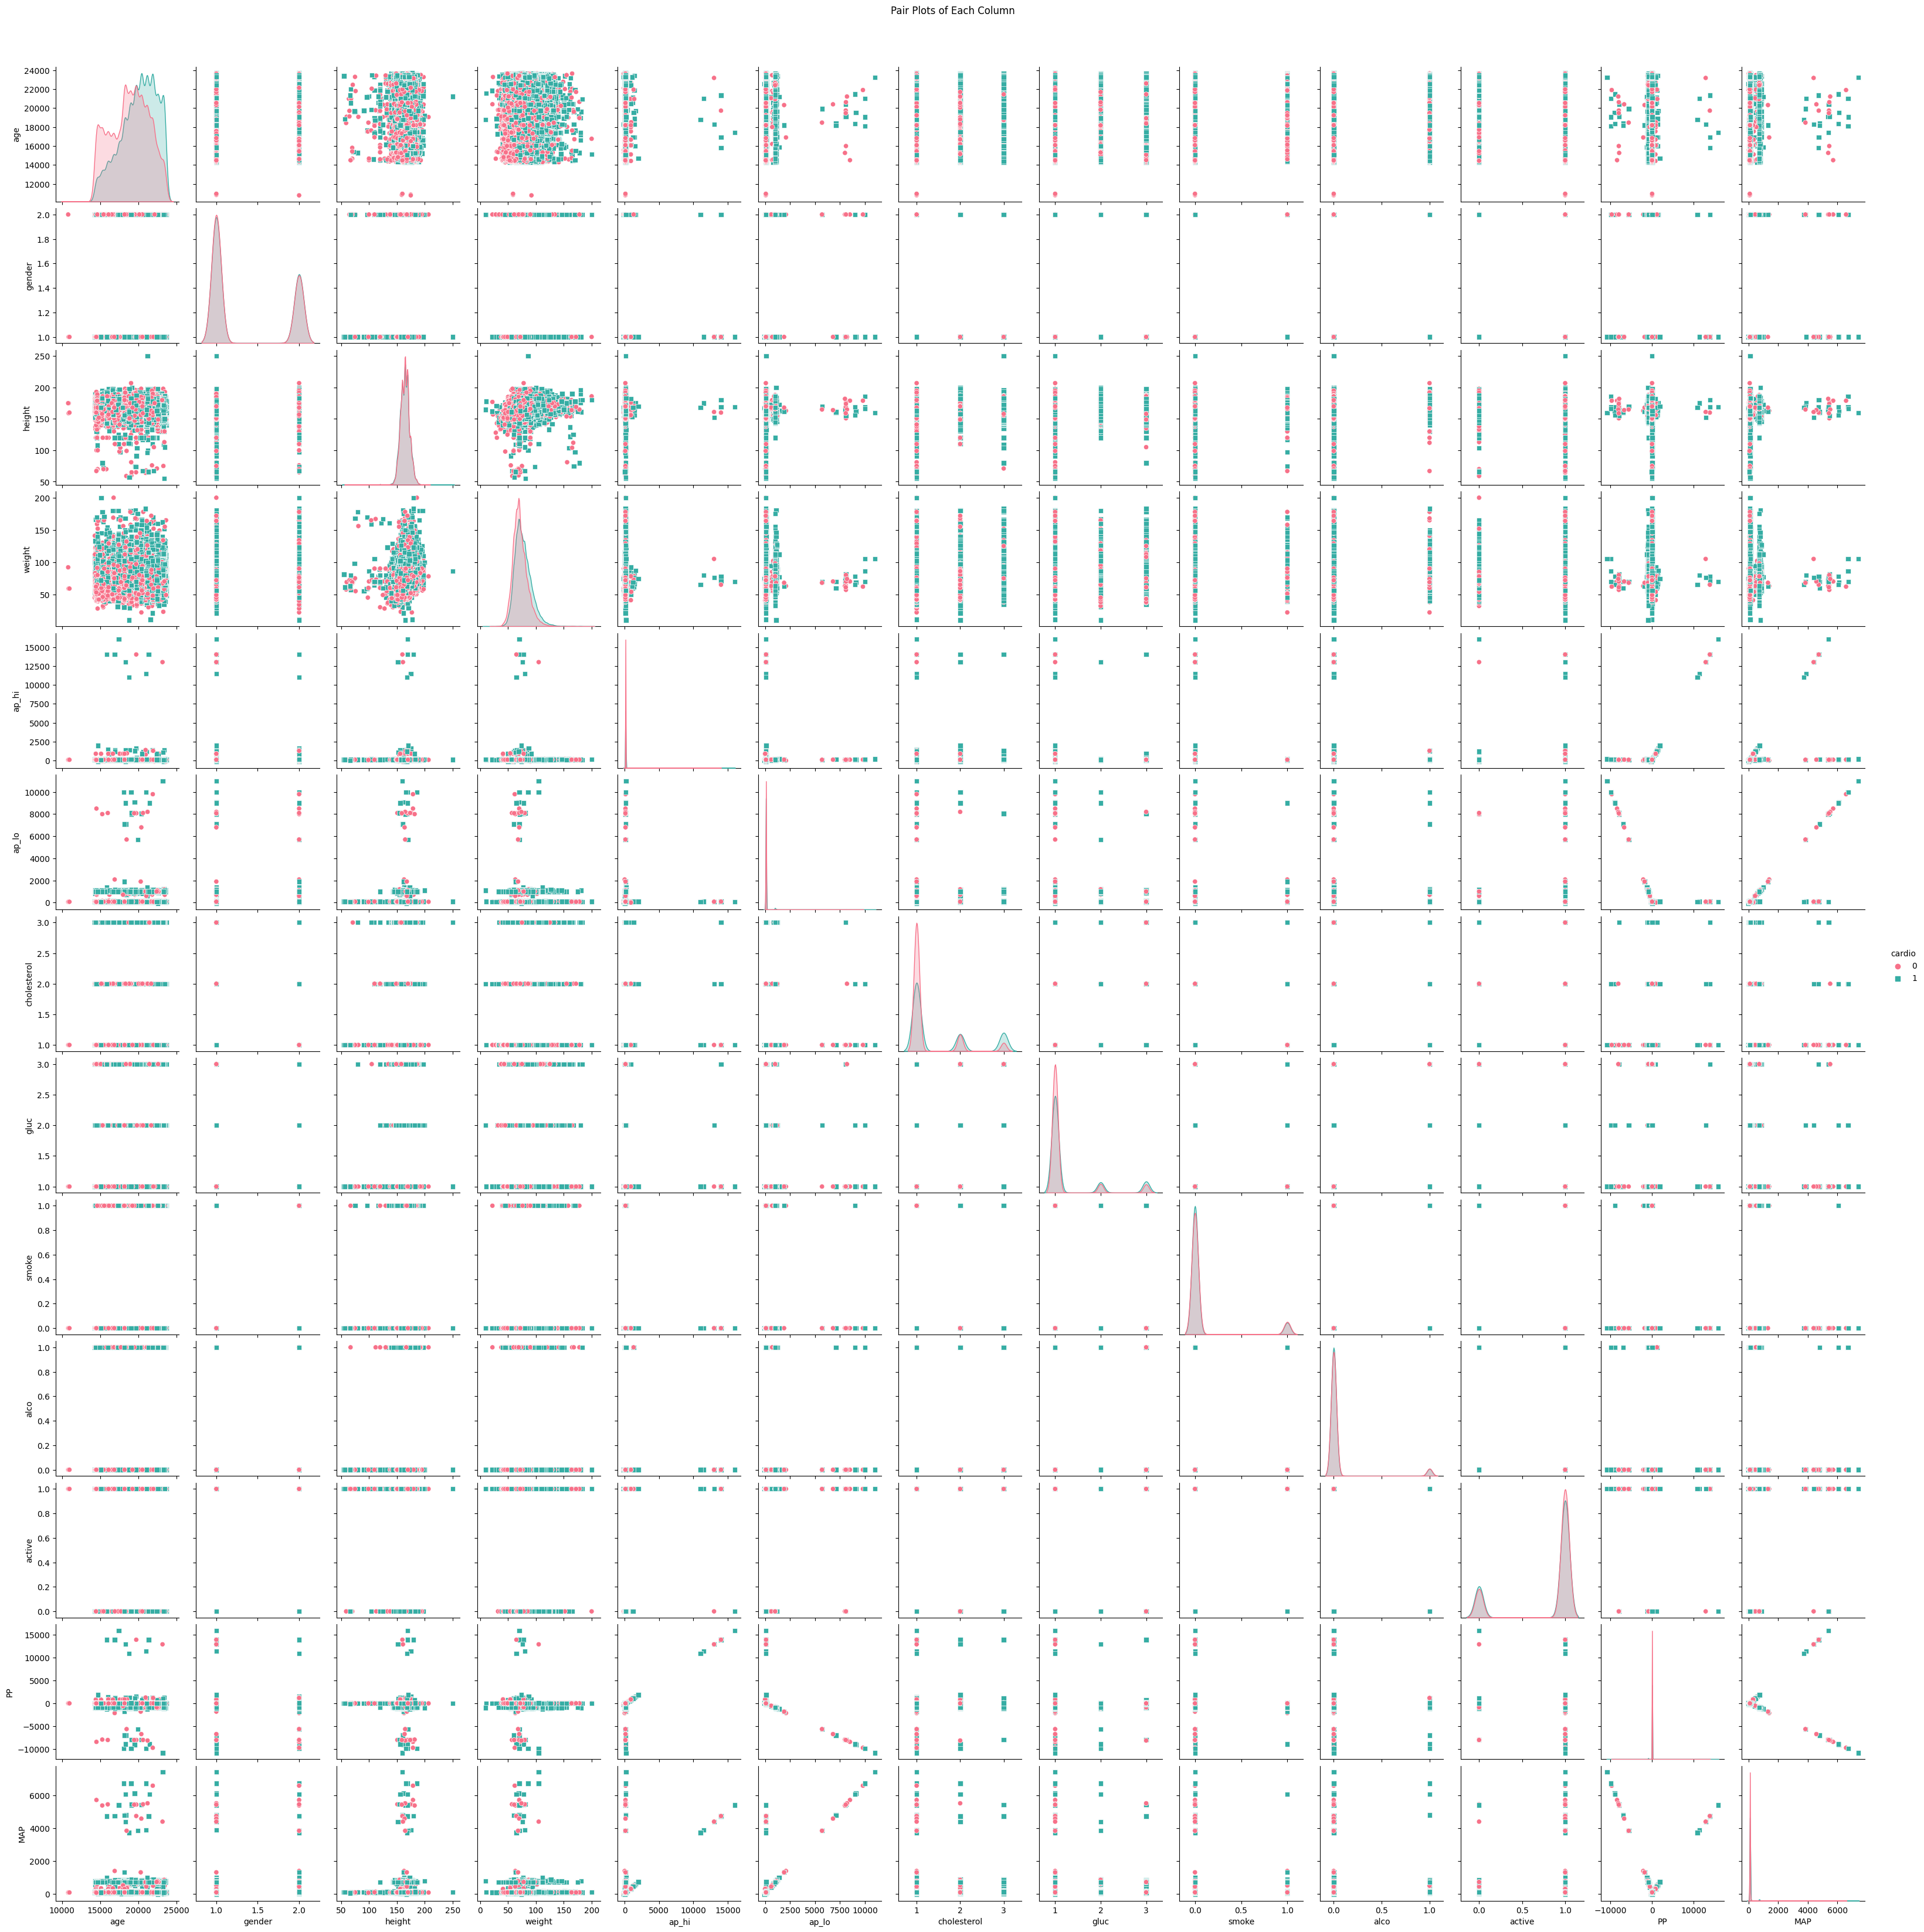

In [ ]:
sns.pairplot(data, diag_kind='kde', hue='cardio', palette='husl', markers=['o', 's'])
plt.suptitle("Pair Plots of Each Column", y=1.02)
plt.show()

**Uni-Variate Analysis**

Box-Plots

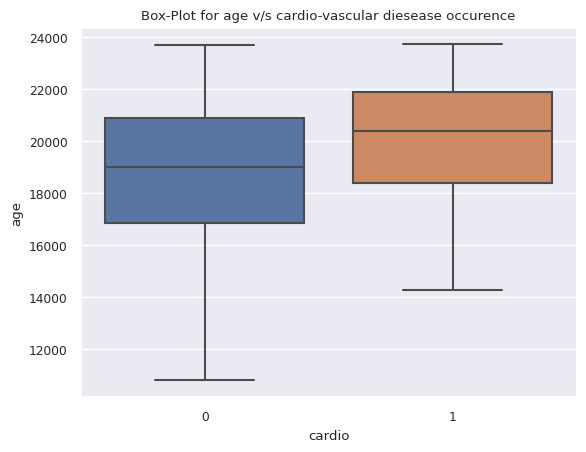

In [ ]:
sns.boxplot(x="cardio",y="age (in days)",data=data)
plt.title("Box-Plot for age v/s cardio-vascular diesease occurence")
plt.show()

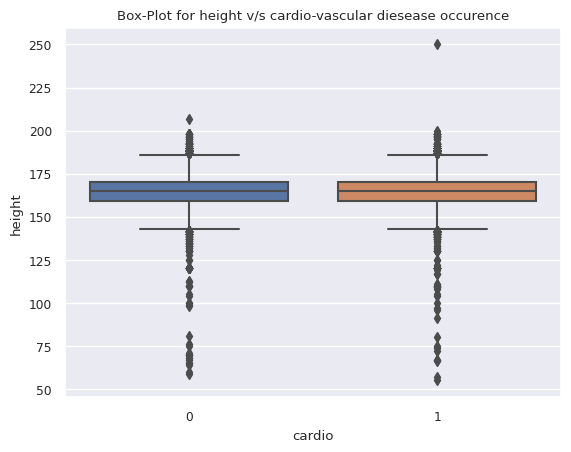

In [ ]:
sns.boxplot(x="cardio",y="height (in cm)",data=data)
plt.title("Box-Plot for height v/s cardio-vascular diesease occurence")
plt.show()

Max Weight =  200
Min Weight =  10
Mean Weight =  74
Median Weight =  72


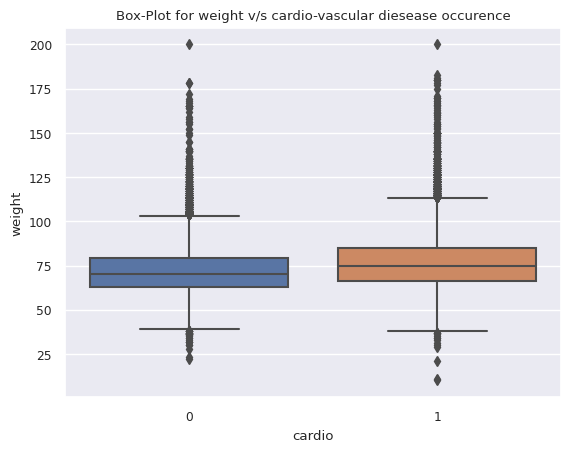

In [ ]:
sns.boxplot(x="cardio",y="weight (in kg)",data=data)
plt.title("Box-Plot for weight v/s cardio-vascular diesease occurence")
plt.show()

******************VERY HIGH OUTLIERS IN AP_HI    ****************************

16020
-150
120


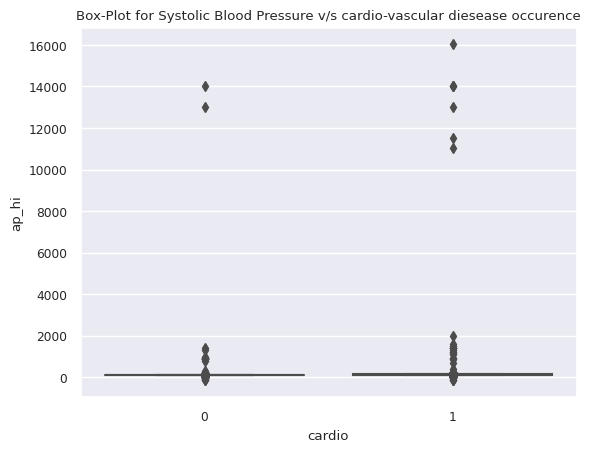

In [ ]:
sns.boxplot(x="cardio",y="ap_hi (in mmHg)",data=data)
plt.title("Box-Plot for Systolic Blood Pressure v/s cardio-vascular diesease occurence")

People Not Having Cardiovascular Diseases :-
People Not Having Cardiovascular Diseases :-
Mean Systolic Pressure =  84.25176322777762
Median Systolic Pressure =  80.0
Max Systolic Pressure =  9800.0
Min Systolic Pressure =  0.0
People having Cardio Vascular Diseases :-
People Having Cardiovascular Diseases :-
Mean Systolic Pressure =  109.02392864290003
Median Systolic Pressure =  80.0
Max Systolic Pressure =  11000.0
Min Systolic Pressure =  -70.0


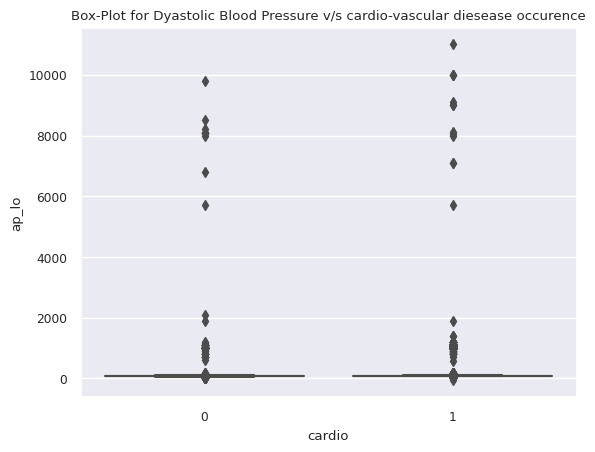

0         80
1         90
2         70
3        100
4         60
        ... 
69995     80
69996     90
69997     90
69998     80
69999     80
Name: ap_lo, Length: 70000, dtype: int64


In [ ]:
sns.boxplot(x="cardio",y="ap_lo",data=data)
plt.title("Box-Plot for Dyastolic Blood Pressure v/s cardio-vascular diesease occurence")
plt.show()
print(data["ap_lo"])

People Not Having Cardiovascular Diseases :-
People Not Having Cardiovascular Diseases :-
People having Cardio Vascular Diseases :-
People having Cardio Vascular Diseases :-
Mean PP =  28.188112867720633
Median PP =  50.0
Max PP =  15940.0
Min PP =  -10800.0


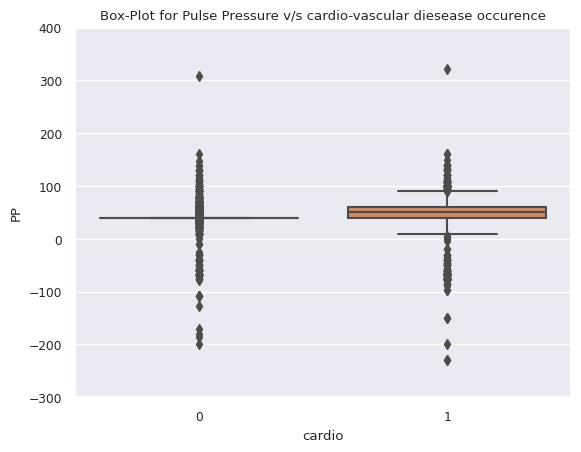

In [ ]:
boxplt = sns.boxplot(x="cardio",y="PP",data=data)
plt.title("Box-Plot for Pulse Pressure v/s cardio-vascular diesease occurence")
boxplt.set_ylim(-300,400)
plt.show()

People Not Having Cardiovascular Diseases :-
Mean MAP =  96.31204134488951
Median MAP =  93.33333333
Max MAP =  6576.666667
Min MAP =  4.0

People having Cardio Vascular Diseases :-
Mean MAP =  118.41996626657259
Median MAP =  100.0
Max MAP =  7400.0
Min MAP =  -41.66666667
Mean MAP =  107.35937142825453
Median MAP =  93.33333333
Min MAP =  -41.66666667
Max MAP =  7400.0


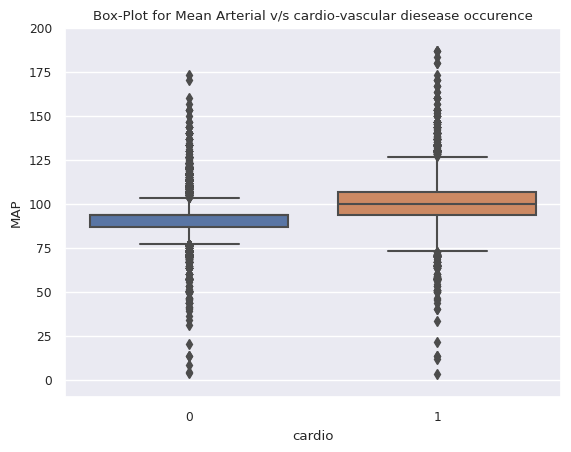

In [ ]:
boxplt = sns.boxplot(x="cardio",y="MAP",data=data)
plt.title("Box-Plot for Mean Arterial v/s cardio-vascular diesease occurence")
boxplt.set_ylim(-10,200)
plt.show()

# **Analysis of the dataset**

**People With no CVD**

Parameter           Max      Min          Mean  \
0                           Age  23678.000000  10798.0  18881.623711   
1                        Weight    200.000000     22.0     71.592150   
2           Systolic BP (ap_hi)  14020.000000   -120.0    120.432598   
3            Dystolic BP(ap_lo)   9800.000000      0.0     84.251763   
4           Pulse Pressure (PP)  13930.000000  -9670.0     36.180834   
5  Mean Arterial Pressure (MAP)   6576.666667      4.0     96.312041   

         Median  
0  19005.000000  
1     70.000000  
2    120.000000  
3     80.000000  
4     40.000000  
5     93.333333

**People With CVD**

### **Histograms**

Histogram showing relative frequencies of the people with and without CVD,in different age brackets.

<Figure size 640x480 with 0 Axes>

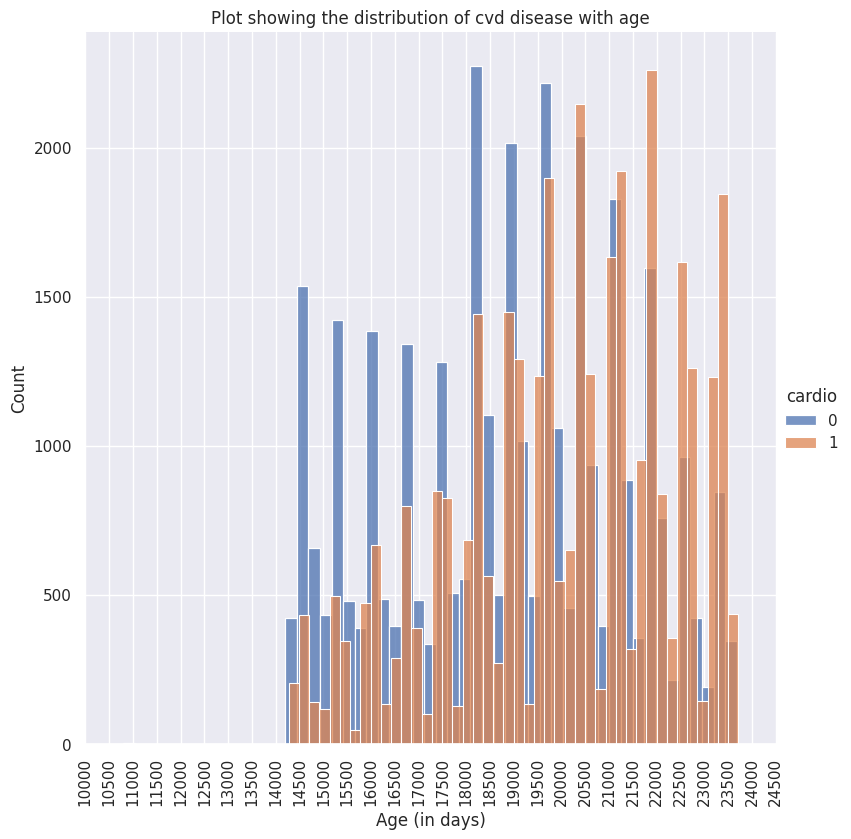

In [ ]:
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data,hue="cardio",height=8).map(sns.histplot,'age').add_legend()
plt.title("Plot showing the distribution of cvd disease with age")
plt.xticks(rotation=90)
plt.xticks(np.arange(10000,25000,500))
plt.xlabel("Age (in days)")
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different height brackets.

<Figure size 640x480 with 0 Axes>

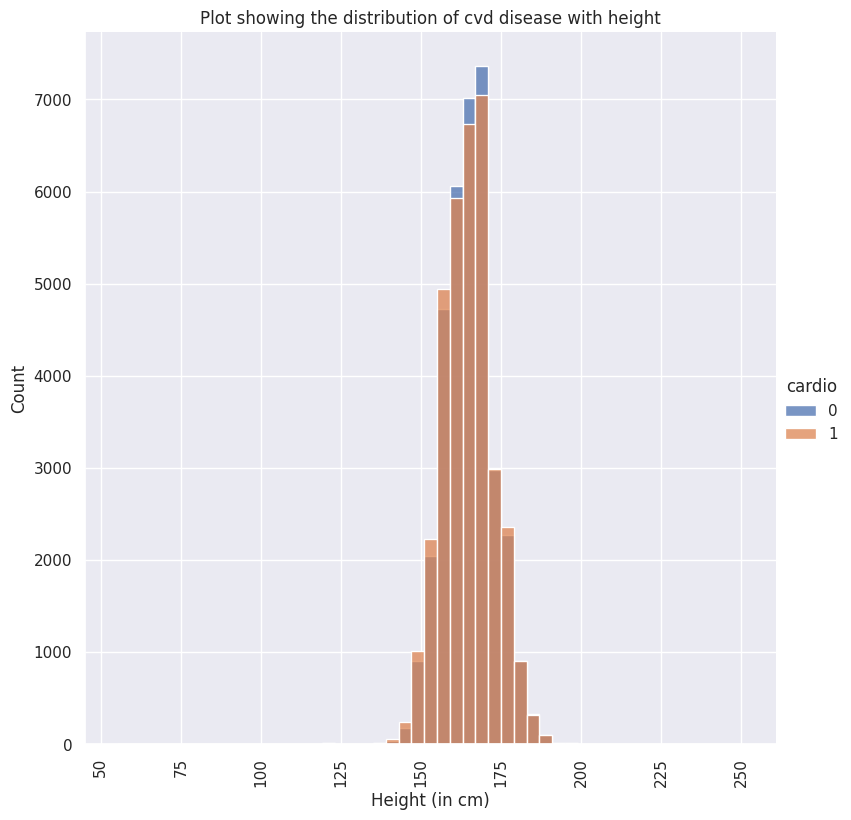

In [ ]:
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data,hue="cardio",height=8).map(sns.histplot,'height',binwidth=4.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with height")
plt.xticks(rotation=90)
plt.xlabel("Height (in cm)")
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different weight brackets.

<Figure size 640x480 with 0 Axes>

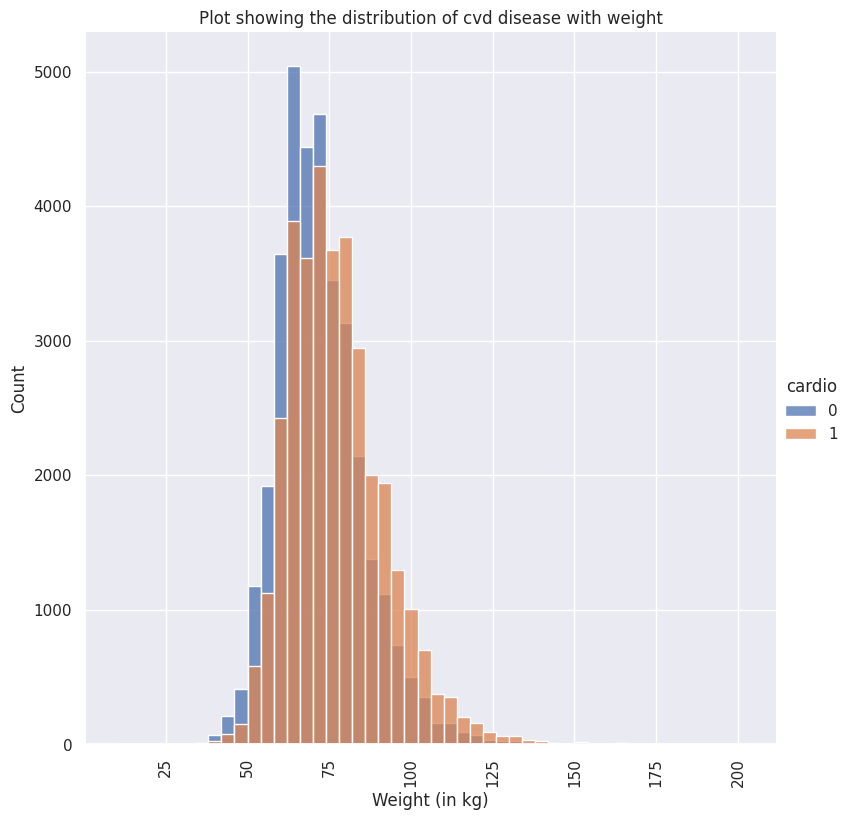

In [ ]:
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data,hue="cardio",height=8).map(sns.histplot,'weight',binwidth=4.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with weight")
plt.xticks(rotation=90)
plt.xlabel("Weight (in kg)")
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different systolic blood pressure brackets.


<Figure size 640x480 with 0 Axes>

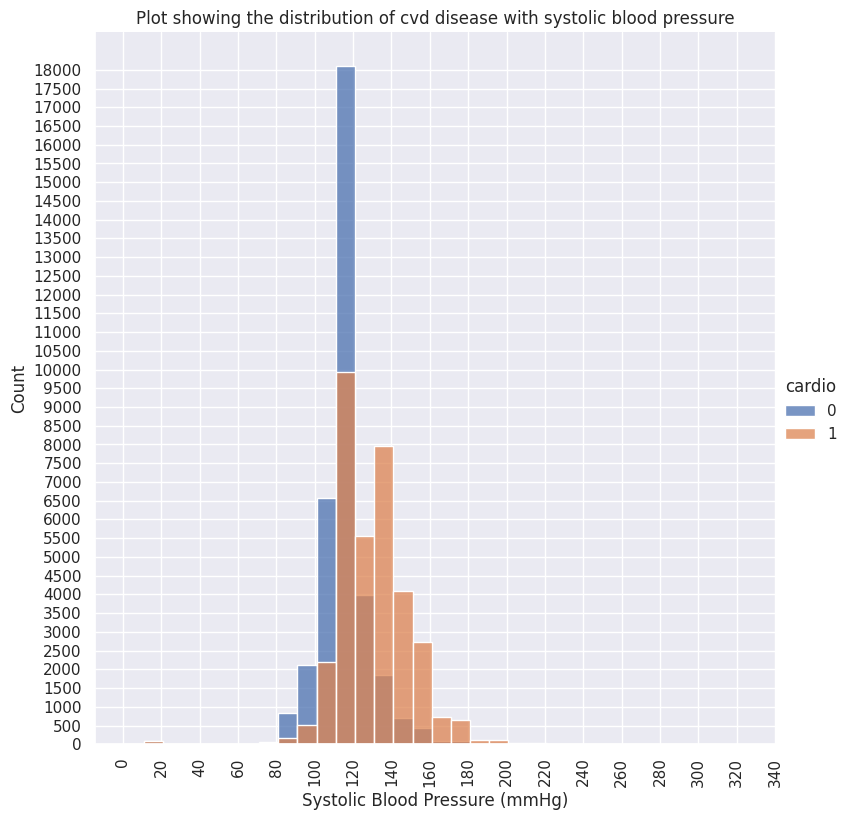

In [ ]:
data2 = data.copy(deep=True)
data2.drop(data[data['ap_hi']>350].index,inplace=True)
data2.drop(data[data['ap_hi']<0].index,inplace=True)
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data2,hue="cardio",height=8).map(sns.histplot,'ap_hi',binwidth=10.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with systolic blood pressure")
plt.xticks(rotation=90)
plt.xticks(np.arange(0,350,20))
plt.yticks(np.arange(0,18500,500))
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different diastolic blood pressure brackets.


<Figure size 640x480 with 0 Axes>

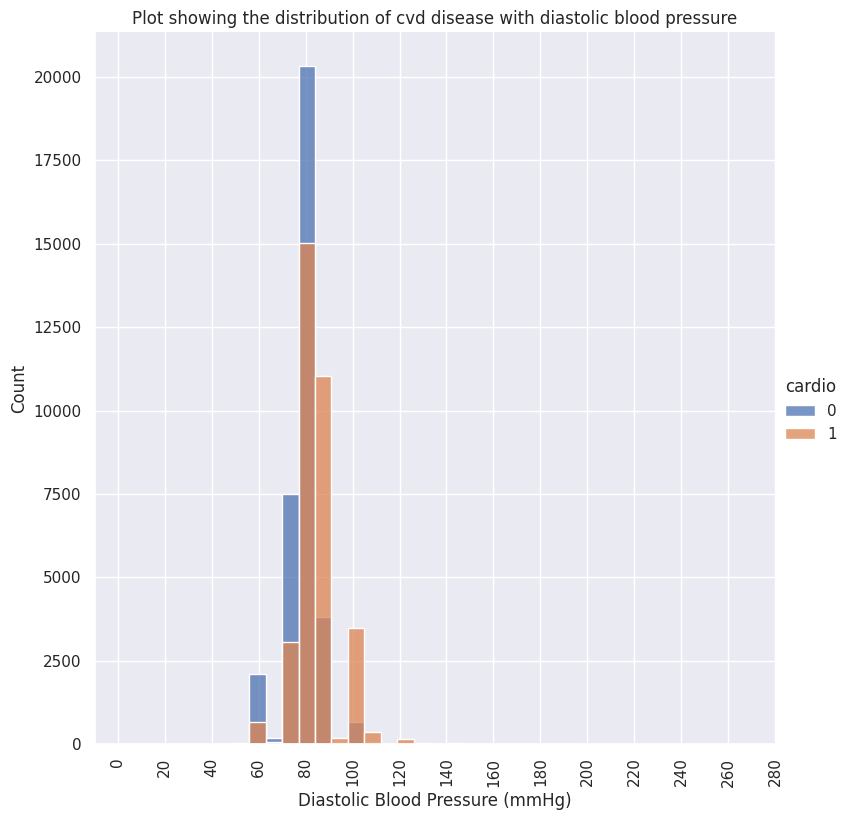

In [ ]:
data3 = data.copy(deep=True)
data3.drop(data[data['ap_lo']>350].index,inplace=True)
data3.drop(data[data['ap_lo']<0].index,inplace=True)
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data3,hue="cardio",height=8).map(sns.histplot,'ap_lo',binwidth=7.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with diastolic blood pressure")
plt.xticks(rotation=90)
plt.xticks(np.arange(0,300,20))
# plt.yticks(np.arange(0,18500,500))
plt.xlabel("Diastolic Blood Pressure (mmHg)")
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different ranges of Pulse Pressure

<Figure size 640x480 with 0 Axes>

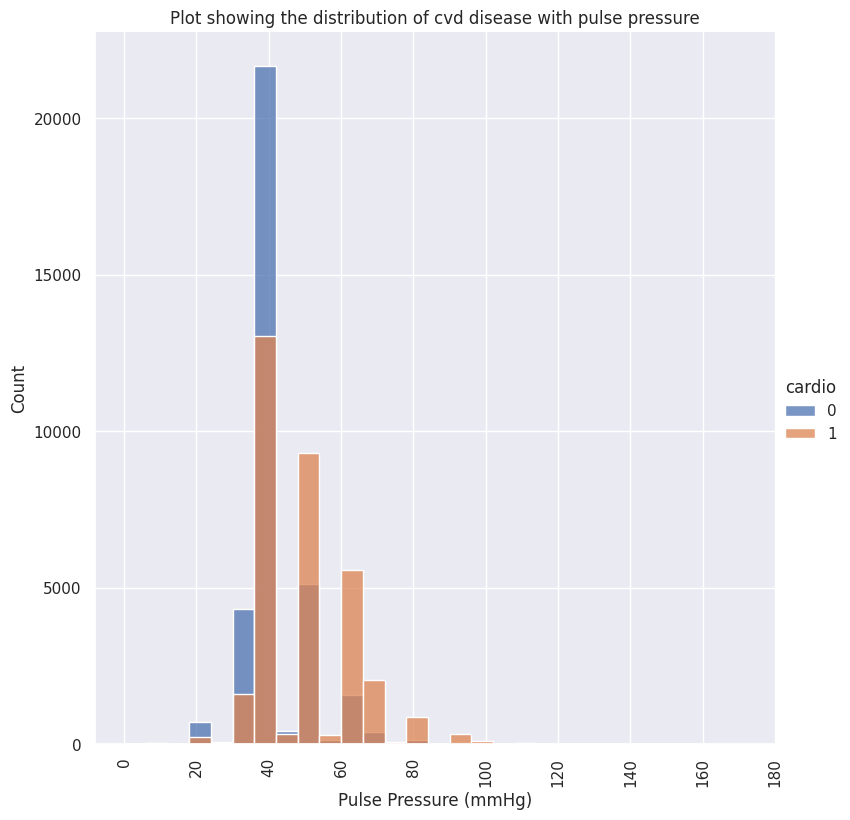

In [ ]:
data4 = data.copy(deep=True)
data4.drop(data[data['PP']>200].index,inplace=True)
data4.drop(data[data['PP']<0].index,inplace=True)
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data4,hue="cardio",height=8).map(sns.histplot,'PP',binwidth=6.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with pulse pressure")
plt.xticks(rotation=90)
plt.xticks(np.arange(0,200,20))
plt.xlabel("Pulse Pressure (mmHg)")
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different ranges of Mean Arterial Pressure (MAP)

<Figure size 640x480 with 0 Axes>

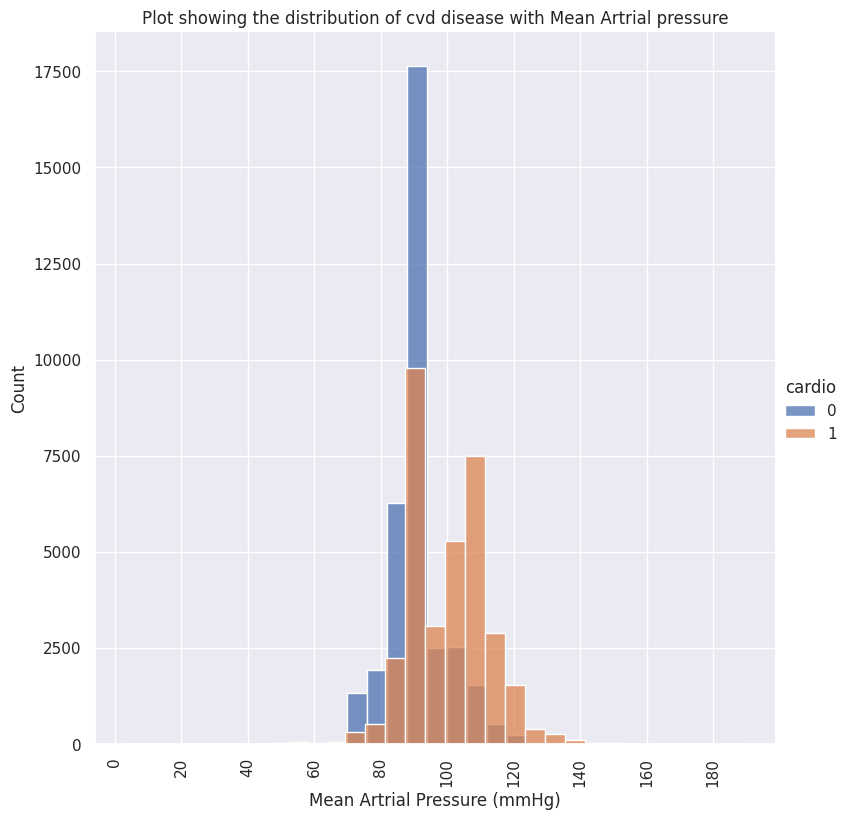

In [ ]:
data5 = data.copy(deep=True)
data5.drop(data[data['MAP']>200].index,inplace=True)
data5.drop(data[data['MAP']<0].index,inplace=True)
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data5,hue="cardio",height=8).map(sns.histplot,'MAP',binwidth=6.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with Mean Artrial pressure")
plt.xticks(rotation=90)
plt.xticks(np.arange(0,200,20))
plt.xlabel("Mean Artrial Pressure (mmHg)")
plt.show()

### **Pie-Charts**

# *Gender*

Pie-Chart percenatges of female with and without CVD

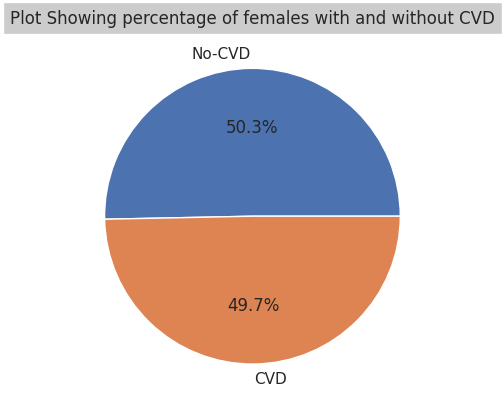

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['gender'] == 1)]),len(data[(data['cardio'] == 1) & (data['gender'] == 1)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of females with and without CVD",bbox={'facecolor':'0.8', 'pad':5})
plt.show()


Plot Showing percentage of males with and without CVD

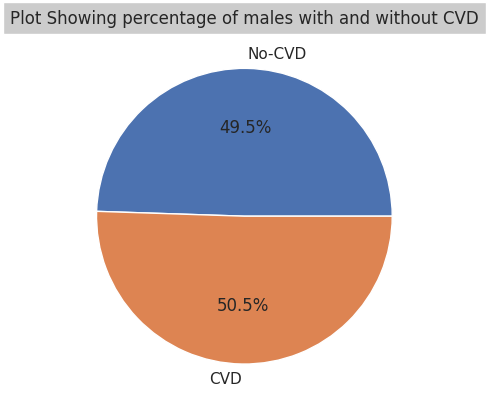

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['gender'] == 2)]),len(data[(data['cardio'] == 1) & (data['gender'] == 2)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of males with and without CVD",bbox={'facecolor':'0.8', 'pad':5})
plt.show()


# *Cholestrol*

% age of people with normal cholestrol,having CVD or not having CVD

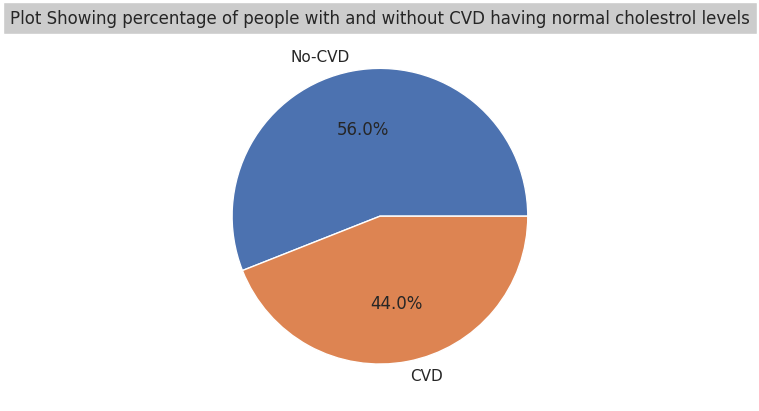

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['cholesterol'] == 1)]),len(data[(data['cardio'] == 1) & (data['cholesterol'] == 1)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having normal cholestrol levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

% age of people with above-normal cholestrol,having CVD or not having CVD

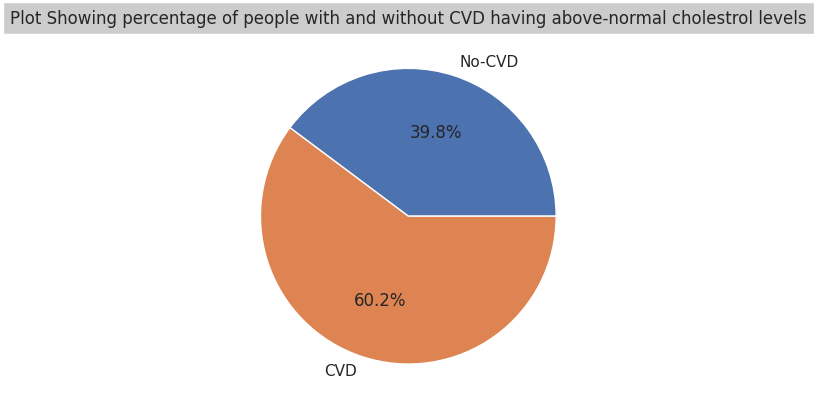

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['cholesterol'] == 2)]),len(data[(data['cardio'] == 1) & (data['cholesterol'] == 2)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having above-normal cholestrol levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

% age of people with well-above-normal cholestrol,having CVD or not having CVD

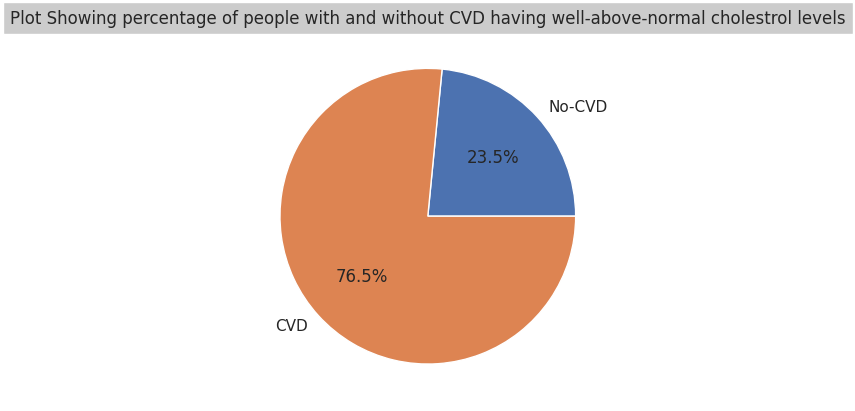

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['cholesterol'] == 3)]),len(data[(data['cardio'] == 1) & (data['cholesterol'] == 3)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having well-above-normal cholestrol levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# *Glucose*

% age of people with normal glucose,having CVD or not having CVD

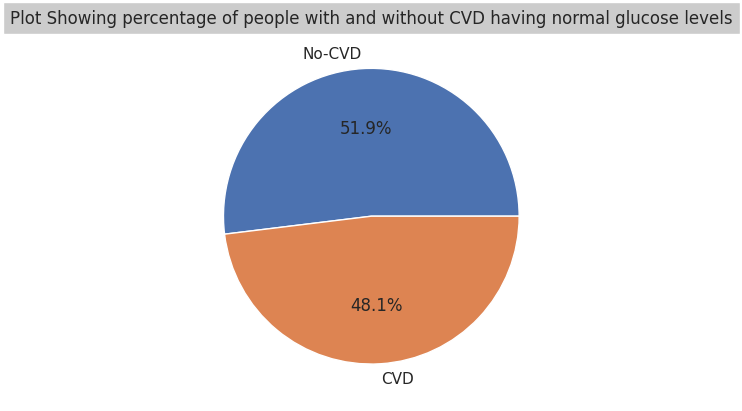

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['gluc'] == 1)]),len(data[(data['cardio'] == 1) & (data['gluc'] == 1)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having normal glucose levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

% age of people with above-normal glucose,having CVD or not having CVD

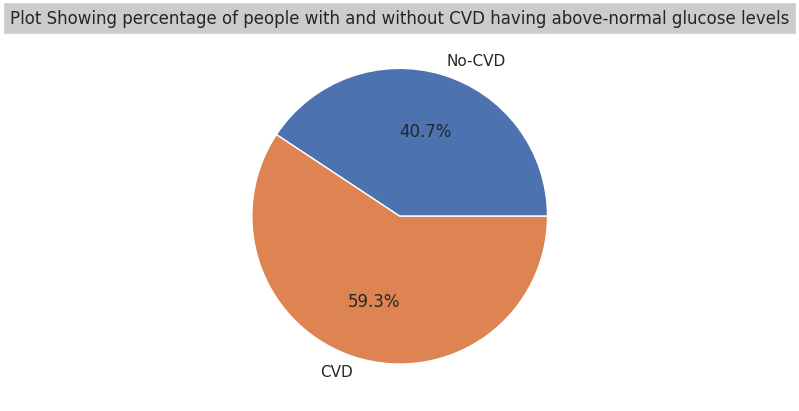

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['gluc'] == 2)]),len(data[(data['cardio'] == 1) & (data['gluc'] == 2)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having above-normal glucose levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

% age of people with well-above-normal glucose,having CVD or not having CVD

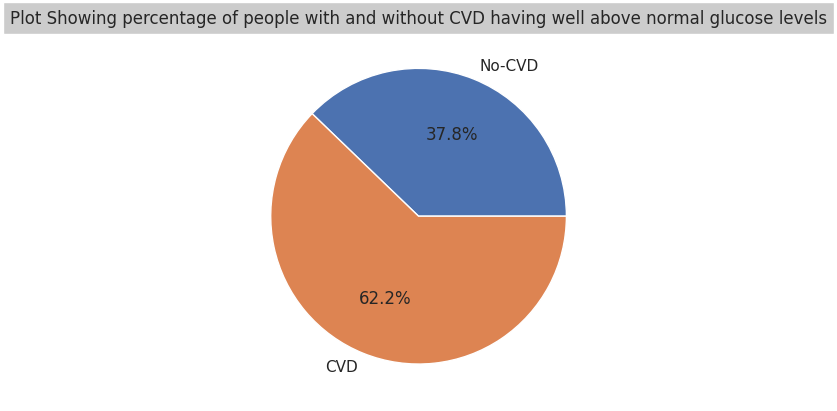

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['gluc'] == 3)]),len(data[(data['cardio'] == 1) & (data['gluc'] == 3)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having well above normal glucose levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# *Life-Style*

% age of people with lazy lifestyle,having CVD or not having CVD

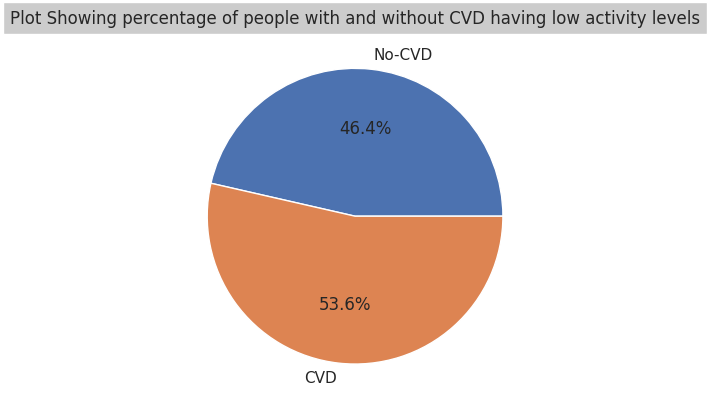

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['active'] == 0)]),len(data[(data['cardio'] == 1) & (data['active'] == 0)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having low activity levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

% age of people with active lifestyle,having CVD or not having CVD

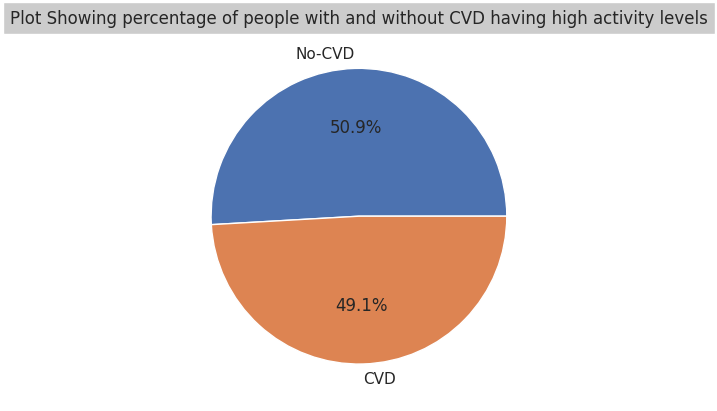

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['active'] == 1)]),len(data[(data['cardio'] == 1) & (data['active'] == 1)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having high activity levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# **Analysis of the dataset**

**People with  no CVD**

In [ ]:
mask_0 = (data['cardio']==0)


print("People with no CVD")

# Various Factors for patients without CVD
age_max_no_cvd =  float(data.loc[mask_0,['age']].max())
age_min_no_cvd = float(data.loc[mask_0,['age']].min())
age_mean_no_cvd = float(data.loc[mask_0,['age']].mean())
age_median_no_cvd = float(data.loc[mask_0,['age']].median())

weight_max_no_cvd =  float(data.loc[mask_0,['weight']].max())
weight_min_no_cvd = float(data.loc[mask_0,['weight']].min())
weight_mean_no_cvd = float(data.loc[mask_0,['weight']].mean())
weight_median_no_cvd = float(data.loc[mask_0,['weight']].median())


sys_max_no_cvd =  float(data.loc[mask_0,['ap_hi']].max())
sys_min_no_cvd = float(data.loc[mask_0,['ap_hi']].min())
sys_mean_no_cvd = float(data.loc[mask_0,['ap_hi']].mean())
sys_median_no_cvd = float(data.loc[mask_0,['ap_hi']].median())


dys_max_no_cvd =  float(data.loc[mask_0,['ap_lo']].max())
dys_min_no_cvd = float(data.loc[mask_0,['ap_lo']].min())
dys_mean_no_cvd = float(data.loc[mask_0,['ap_lo']].mean())
dys_median_no_cvd = float(data.loc[mask_0,['ap_lo']].median())



pp_max_no_cvd =  float(data.loc[mask_0,['PP']].max())
pp_min_no_cvd = float(data.loc[mask_0,['PP']].min())
pp_mean_no_cvd = float(data.loc[mask_0,['PP']].mean())
pp_median_no_cvd = float(data.loc[mask_0,['PP']].median())



map_max_no_cvd =  float(data.loc[mask_0,['MAP']].max())
map_min_no_cvd = float(data.loc[mask_0,['MAP']].min())
map_mean_no_cvd = float(data.loc[mask_0,['MAP']].mean())
map_median_no_cvd = float(data.loc[mask_0,['MAP']].median())



data_no_cvd  =       [ ['Age',age_max_no_cvd,age_min_no_cvd,age_mean_no_cvd,age_median_no_cvd],
                       ['Weight',weight_max_no_cvd,weight_min_no_cvd,weight_mean_no_cvd,weight_median_no_cvd],
                       ['Systolic BP (ap_hi)',sys_max_no_cvd,sys_min_no_cvd,sys_mean_no_cvd,sys_median_no_cvd],
                       ['Dystolic BP(ap_lo)',dys_max_no_cvd,dys_min_no_cvd,dys_mean_no_cvd,dys_median_no_cvd],
                       ['Pulse Pressure (PP)',pp_max_no_cvd,pp_min_no_cvd,pp_mean_no_cvd,pp_median_no_cvd],
                       ['Mean Arterial Pressure (MAP)',map_max_no_cvd,map_min_no_cvd,map_mean_no_cvd,map_median_no_cvd]
                     ]



analysis_df_no_cvd = pd.DataFrame(data_no_cvd,columns = ['Parameter','Max','Min','Mean','Median'])
analysis_df_no_cvd

People with no CVD


Parameter           Max      Min          Mean  \
0                           Age  23678.000000  10798.0  18881.623711   
1                        Weight    200.000000     22.0     71.592150   
2           Systolic BP (ap_hi)  14020.000000   -120.0    120.432598   
3            Dystolic BP(ap_lo)   9800.000000      0.0     84.251763   
4           Pulse Pressure (PP)  13930.000000  -9670.0     36.180834   
5  Mean Arterial Pressure (MAP)   6576.666667      4.0     96.312041   

         Median  
0  19005.000000  
1     70.000000  
2    120.000000  
3     80.000000  
4     40.000000  
5     93.333333

**People with CVD**

In [ ]:
mask_1 = (data['cardio']==1)


print("People with CVD")
# Various Factors for patients with CVD
age_max_cvd =  float(data.loc[mask_1,['age']].max())
age_min_cvd = float(data.loc[mask_1,['age']].min())
age_mean_cvd = float(data.loc[mask_1,['age']].mean())
age_median_cvd = float(data.loc[mask_1,['age']].median())

weight_max_cvd =  float(data.loc[mask_1,['weight']].max())
weight_min_cvd = float(data.loc[mask_1,['weight']].min())
weight_mean_cvd = float(data.loc[mask_1,['weight']].mean())
weight_median_cvd = float(data.loc[mask_1,['weight']].median())


sys_max_cvd =  float(data.loc[mask_1,['ap_hi']].max())
sys_min_cvd = float(data.loc[mask_1,['ap_hi']].min())
sys_mean_cvd = float(data.loc[mask_1,['ap_hi']].mean())
sys_median_cvd = float(data.loc[mask_1,['ap_hi']].median())


dys_max_cvd =  float(data.loc[mask_1,['ap_lo']].max())
dys_min_cvd = float(data.loc[mask_1,['ap_lo']].min())
dys_mean_cvd = float(data.loc[mask_1,['ap_lo']].mean())
dys_median_cvd = float(data.loc[mask_1,['ap_lo']].median())



pp_max_cvd =  float(data.loc[mask_1,['PP']].max())
pp_min_cvd = float(data.loc[mask_1,['PP']].min())
pp_mean_cvd = float(data.loc[mask_1,['PP']].mean())
pp_median_cvd = float(data.loc[mask_1,['PP']].median())



map_max_cvd =  float(data.loc[mask_1,['MAP']].max())
map_min_cvd = float(data.loc[mask_1,['MAP']].min())
map_mean_cvd = float(data.loc[mask_1,['MAP']].mean())
map_median_cvd = float(data.loc[mask_1,['MAP']].median())



data_cvd  =       [ ['Age',age_max_cvd,age_min_cvd,age_mean_cvd,age_median_cvd],
                       ['Weight',weight_max_cvd,weight_min_cvd,weight_mean_cvd,weight_median_cvd],
                       ['Systolic BP (ap_hi)',sys_max_cvd,sys_min_cvd,sys_mean_cvd,sys_median_cvd],
                       ['Dystolic BP(ap_lo)',dys_max_cvd,dys_min_cvd,dys_mean_cvd,dys_median_cvd],
                       ['Pulse Pressure (PP)',pp_max_cvd,pp_min_cvd,pp_mean_cvd,pp_median_cvd],
                       ['Mean Arterial Pressure (MAP)',map_max_cvd,map_min_cvd,map_mean_cvd,map_median_cvd]
                     ]



analysis_df_cvd = pd.DataFrame(data_cvd,columns = ['Parameter','Max','Min','Mean','Median'])
analysis_df_cvd

People with CVD


Parameter      Max           Min          Mean   Median
0                           Age  23713.0  14275.000000  20056.813031  20384.0
1                        Weight    200.0     10.000000     76.822368     75.0
2           Systolic BP (ap_hi)  16020.0   -150.000000    137.212042    130.0
3            Dystolic BP(ap_lo)  11000.0    -70.000000    109.023929     80.0
4           Pulse Pressure (PP)  15940.0 -10800.000000     28.188113     50.0
5  Mean Arterial Pressure (MAP)   7400.0    -41.666667    118.419966    100.0

# Outlier Detction and Cleaning

**Z-Score**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


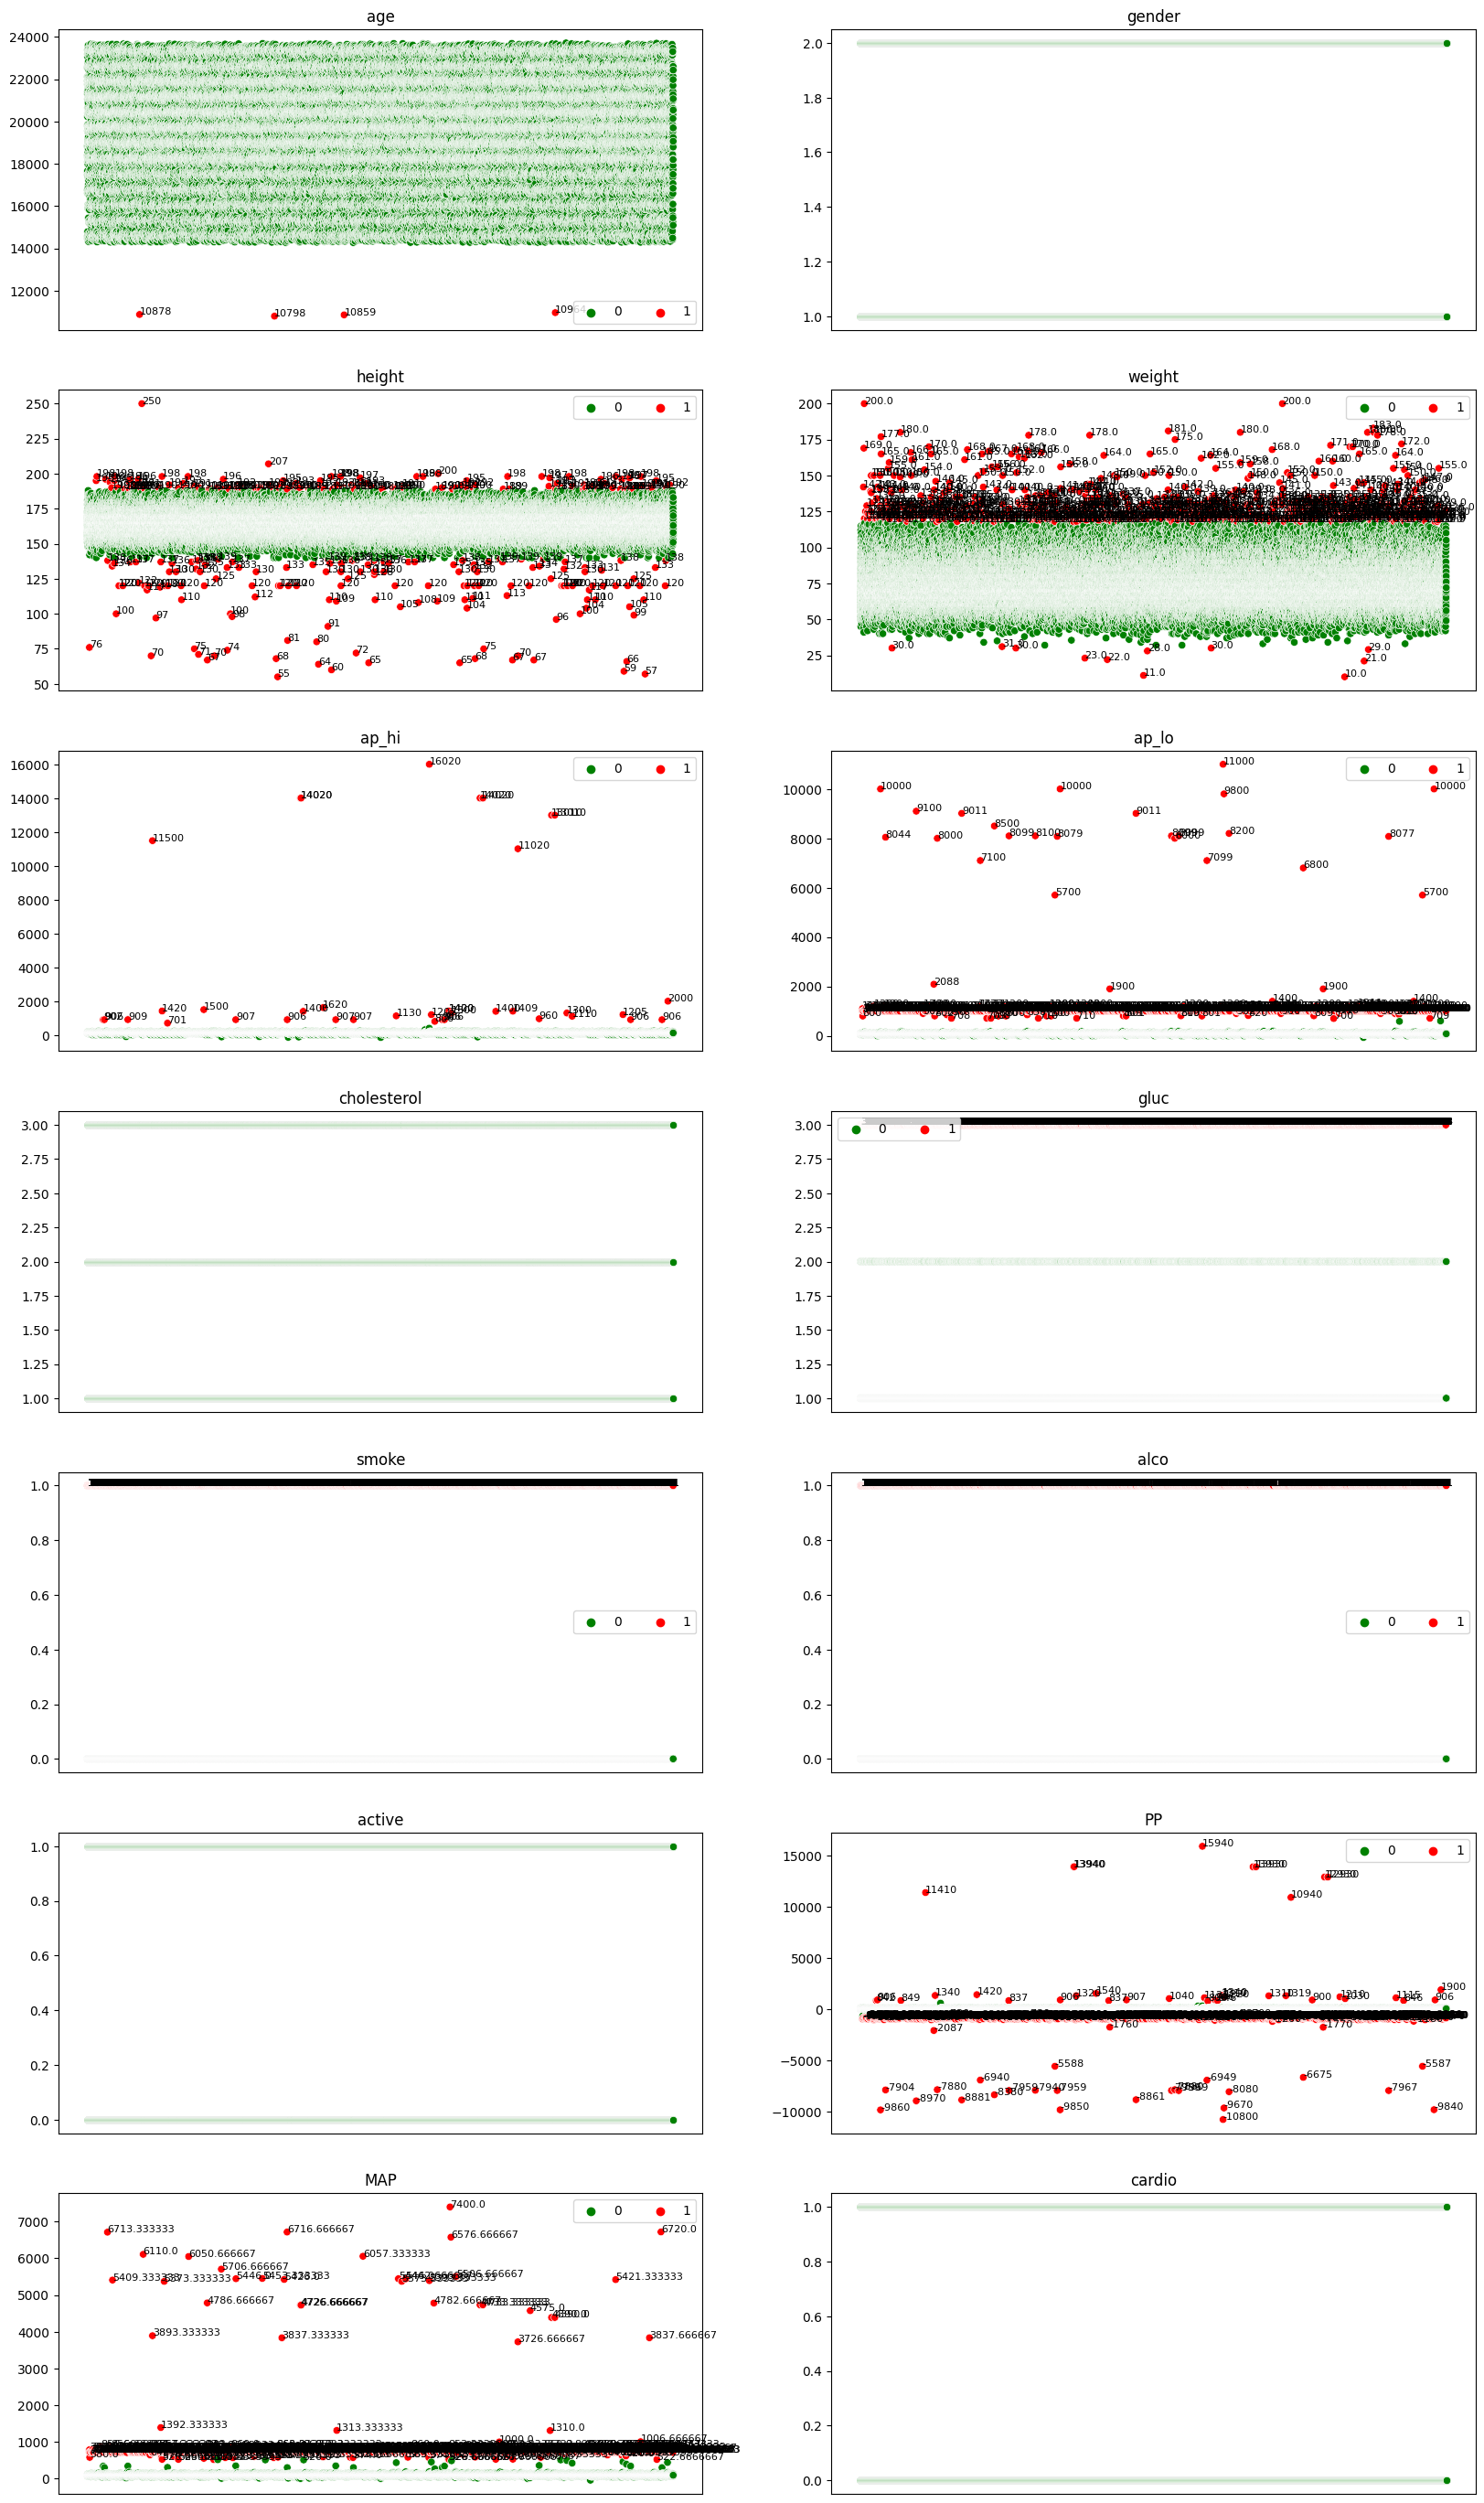

In [7]:
# Function for Z-score outlier detection
def zscore_outlier(x, lb, ub):
    zscore = ((x - x.mean()) / x.std()).copy()
    result_ = pd.Series([0] * len(x))
    result_[(zscore < lb) | (zscore > ub)] = 1
    return result_

# PLOTTING A SCATTER PLOT AND HIGHLIGHTING THE OUTLIERS DETECTED BY Z-SCORE METHOD
num_columns = len(data.columns)
num_rows = (num_columns + 1) // 2  # Calculate the number of rows needed

fig, ax = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))
row = col = 0

for n, i in enumerate(data.columns):
    if (n % 2 == 0) and (n > 0):
        row += 1
        col = 0
    outliers = zscore_outlier(data[i], -3, 3)

    if sum(outliers) == 0:
        sns.scatterplot(x=np.arange(len(data[i])), y=data[i], ax=ax[row, col], legend=False, color='green')
    else:
        sns.scatterplot(x=np.arange(len(data[i])), y=data[i], ax=ax[row, col], hue=outliers, palette=['green', 'red'])
    for x, y in zip(np.arange(len(data[i]))[outliers == 1], data[i][outliers == 1]):
        ax[row, col].text(x=x, y=y, s=y, fontsize=8)
    ax[row, col].set_ylabel("")
    ax[row, col].set_title(i)
    ax[row, col].xaxis.set_visible(False)
    if sum(outliers) > 0:
        ax[row, col].legend(ncol=2)
    col += 1

# Remove unused subplots
for r in range(row+1, num_rows):
    for c in range(2):
        ax[r, c].axis('off')

plt.show()

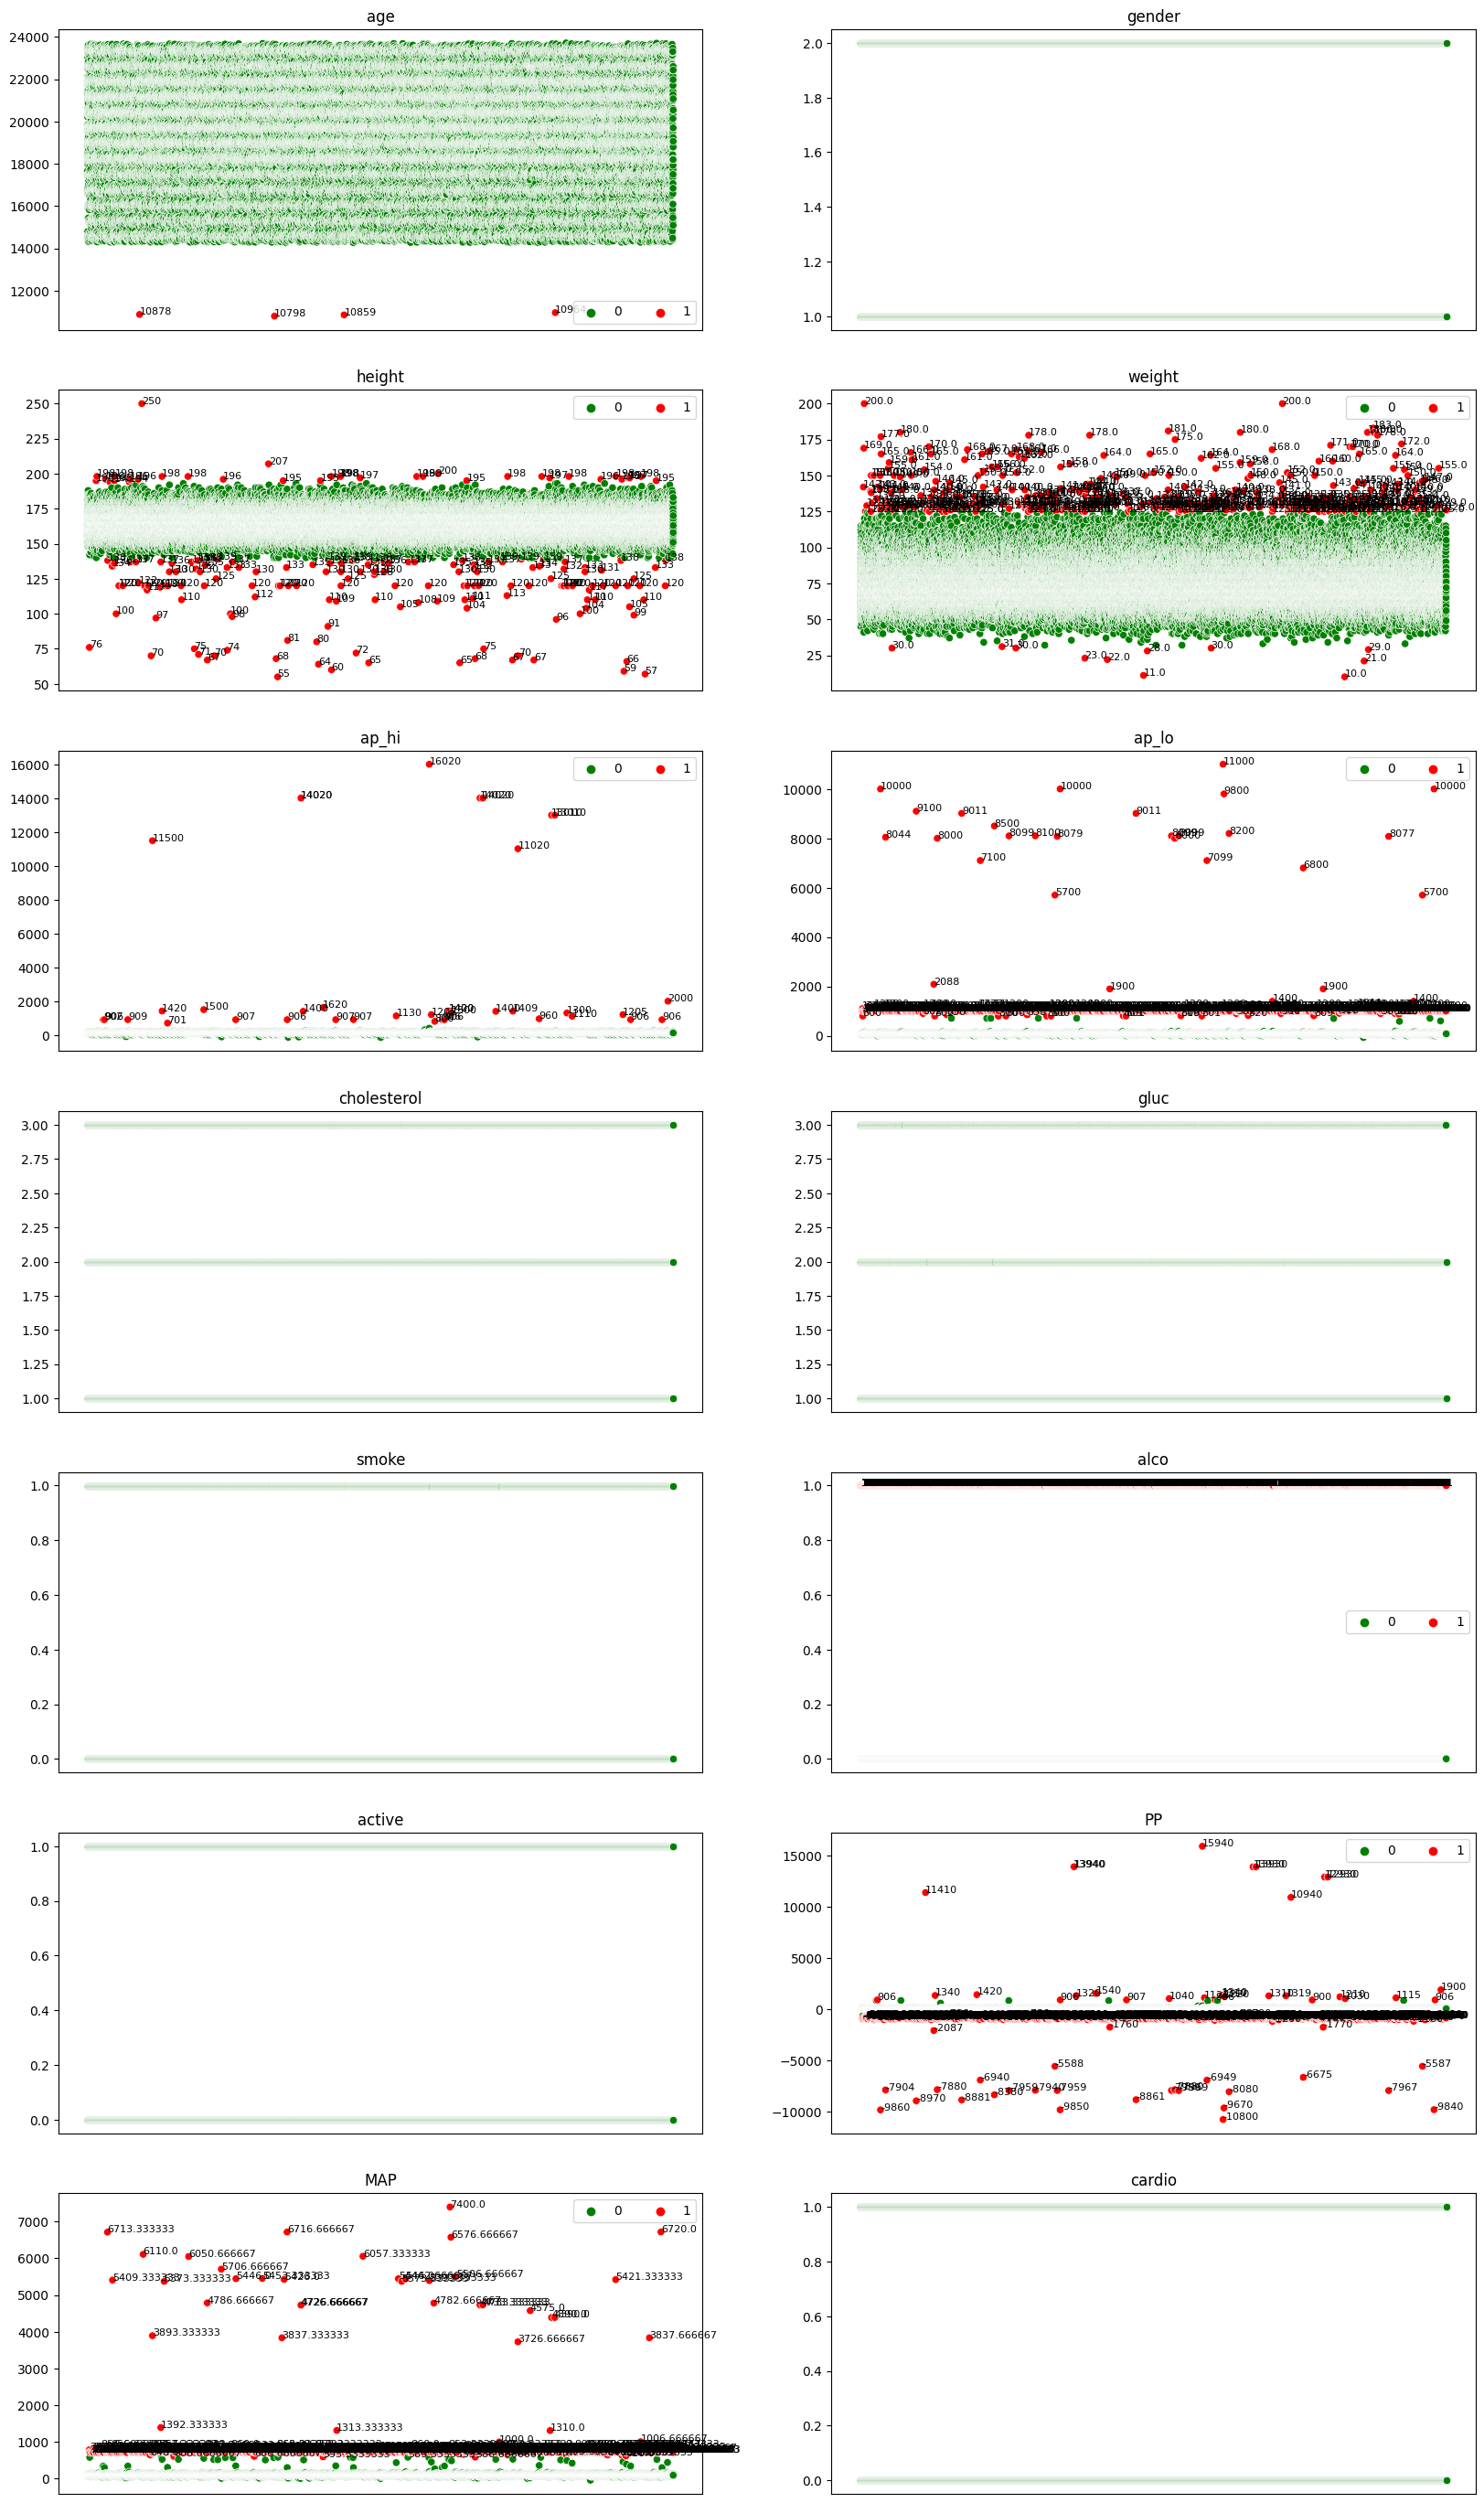

Filtered Data:
           age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0      18393.0     2.0   168.0    62.0  110.0   80.0          1.0   1.0   
1      20228.0     1.0   156.0    85.0  140.0   90.0          3.0   1.0   
2      18857.0     1.0   165.0    64.0  130.0   70.0          3.0   1.0   
3      17623.0     2.0   169.0    82.0  150.0  100.0          1.0   1.0   
4      17474.0     1.0   156.0    56.0  100.0   60.0          1.0   1.0   
...        ...     ...     ...     ...    ...    ...          ...   ...   
69995  19240.0     2.0   168.0    76.0  120.0   80.0          1.0   1.0   
69996  22601.0     1.0   158.0     NaN  140.0   90.0          2.0   2.0   
69997  19066.0     2.0   183.0   105.0  180.0   90.0          3.0   1.0   
69998  22431.0     1.0   163.0    72.0  135.0   80.0          1.0   2.0   
69999  20540.0     1.0   170.0    72.0  120.0   80.0          2.0   1.0   

       smoke  alco  active    PP         MAP  cardio  
0        0.0   0.0     1.0  3

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function for Z-score outlier detection
def zscore_outlier(x, lb, ub):
    zscore = ((x - x.mean()) / x.std()).copy()
    result_ = pd.Series([0] * len(x))
    result_[(zscore < lb) | (zscore > ub)] = 1
    return result_

# Assuming 'data' is your DataFrame

# PLOTTING A SCATTER PLOT AND HIGHLIGHTING THE OUTLIERS DETECTED BY Z-SCORE METHOD
num_columns = len(data.columns)
num_rows = (num_columns + 1) // 2  # Calculate the number of rows needed

fig, ax = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))
row = col = 0

# Create a new DataFrame to store the filtered data
filtered_data = data.copy()

for n, i in enumerate(data.columns):
    if (n % 2 == 0) and (n > 0):
        row += 1
        col = 0
    outliers = zscore_outlier(data[i], -3, 3.5)

    # Remove outliers from the DataFrame
    filtered_data[i] = np.where(outliers == 1, np.nan, data[i])

    if sum(outliers) == 0:
        sns.scatterplot(x=np.arange(len(data[i])), y=data[i], ax=ax[row, col], legend=False, color='green')
    else:
        sns.scatterplot(x=np.arange(len(data[i])), y=data[i], ax=ax[row, col], hue=outliers, palette=['green', 'red'])
    for x, y in zip(np.arange(len(data[i]))[outliers == 1], data[i][outliers == 1]):
        ax[row, col].text(x=x, y=y, s=y, fontsize=8)
    ax[row, col].set_ylabel("")
    ax[row, col].set_title(i)
    ax[row, col].xaxis.set_visible(False)
    if sum(outliers) > 0:
        ax[row, col].legend(ncol=2)
    col += 1

# Remove unused subplots
for r in range(row+1, num_rows):
    for c in range(2):
        ax[r, c].axis('off')

plt.show()


In [11]:

# Display the filtered data
print("Filtered Data:")
filtered_data = filtered_data.dropna()
print(filtered_data)


Filtered Data:
           age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0      18393.0     2.0   168.0    62.0  110.0   80.0          1.0   1.0   
1      20228.0     1.0   156.0    85.0  140.0   90.0          3.0   1.0   
2      18857.0     1.0   165.0    64.0  130.0   70.0          3.0   1.0   
3      17623.0     2.0   169.0    82.0  150.0  100.0          1.0   1.0   
4      17474.0     1.0   156.0    56.0  100.0   60.0          1.0   1.0   
...        ...     ...     ...     ...    ...    ...          ...   ...   
69993  19699.0     1.0   172.0    70.0  130.0   90.0          1.0   1.0   
69994  21074.0     1.0   165.0    80.0  150.0   80.0          1.0   1.0   
69995  19240.0     2.0   168.0    76.0  120.0   80.0          1.0   1.0   
69998  22431.0     1.0   163.0    72.0  135.0   80.0          1.0   2.0   
69999  20540.0     1.0   170.0    72.0  120.0   80.0          2.0   1.0   

       smoke  alco  active    PP         MAP  cardio  
0        0.0   0.0     1.0  3

**LOF**

In [ ]:
#splitting independent and dependent data
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
display(x)

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  PP         MAP  
0          0     0       1  30   90.000000  
1          0     0       1  50  106.666667  
2          0     0       0  60   90.000000  
3          0     0       1  50  116.666667  
4          0     0       0  40   73.333333  
...      ...   ...     ...  ..         ...  
69995      1     0       1  40   93.333333  
69996      0     0       1  50  106.666667  
69997      0     1       0  90  120.000000  
69998      0     0       0  55   98.333333  
69999      0     0       1  40   93.333333  

[70000 rows x 14 columns]

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Create an LOF model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # Adjust the parameters as needed

# Fit the LOF model to the data
outlier_scores = lof.fit_predict(X_lda)

# Now, 'outlier_scores' contains the LOF scores for each sample.
# Negative scores indicate outliers, and positive scores indicate inliers.

# Add the LOF scores to your DataFrame for further analysis if desired
x['LOF_Score'] = outlier_scores

# Display the data with LOF scores
display(x)


id       age    gender    height    weight     ap_hi     ap_lo  \
0     -1.732080  1.364055  0.443452 -0.847873 -0.122182  0.494167 -0.009057   
1     -1.732046 -0.733108 -1.018168  0.749831  0.072610  0.494167  0.073770   
2     -1.732011 -0.733108  0.078047 -0.708942  0.007679 -2.023607  0.115184   
3     -1.731976  1.364055  0.565254  0.541435  0.137541  0.494167  0.073770   
4     -1.731942 -0.733108 -1.018168 -1.264666 -0.187113 -2.023607  0.032357   
...         ...       ...       ...       ...       ...       ...       ...   
69995  1.733750  1.364055  0.443452  0.124642 -0.057251  0.494167  0.032357   
69996  1.733819 -0.733108 -0.774565  3.597913  0.072610  0.494167  0.073770   
69997  1.733854  1.364055  2.270477  2.139139  0.332333 -2.023607  0.239424   
69998  1.733923 -0.733108 -0.165556 -0.153219  0.040145 -2.023607  0.094477   
69999  1.733958 -0.733108  0.687055 -0.153219 -0.057251  0.494167  0.032357   

       cholesterol   gluc  smoke  alco  active   PP         MAP  LOF_Score  
0          18393.0   80.0    1.0   1.0     0.0  0.0   90.000000          1  
1          20228.0   90.0    3.0   1.0     0.0  0.0  106.666667          1  
2          18857.0   70.0    3.0   1.0     0.0  0.0   90.000000          1  
3          17623.0  100.0    1.0   1.0     0.0  0.0  116.666667          1  
4          17474.0   60.0    1.0   1.0     0.0  0.0   73.333333          1  
...            ...    ...    ...   ...     ...  ...         ...        ...  
69995      19240.0   80.0    1.0   1.0     1.0  0.0   93.333333          1  
69996      22601.0   90.0    2.0   2.0     0.0  0.0  106.666667          1  
69997      19066.0   90.0    3.0   1.0     0.0  1.0  120.000000          1  
69998      22431.0   80.0    1.0   2.0     0.0  0.0   98.333333          1  
69999      20540.0   80.0    2.0   1.0     0.0  0.0   93.333333          1  

[70000 rows x 15 columns]

In [ ]:
# Filter out outliers based on LOF scores
x_cleaned = x[x['LOF_Score'] >= 0].copy()

# Drop the 'LOF_Score' column if you no longer need it
x_cleaned.drop(columns=['LOF_Score'], inplace=True)

# Display the cleaned DataFrame
display(x_cleaned)


id       age    gender    height    weight     ap_hi     ap_lo  \
0     -1.732080  1.364055  0.443452 -0.847873 -0.122182  0.494167 -0.009057   
1     -1.732046 -0.733108 -1.018168  0.749831  0.072610  0.494167  0.073770   
2     -1.732011 -0.733108  0.078047 -0.708942  0.007679 -2.023607  0.115184   
3     -1.731976  1.364055  0.565254  0.541435  0.137541  0.494167  0.073770   
4     -1.731942 -0.733108 -1.018168 -1.264666 -0.187113 -2.023607  0.032357   
...         ...       ...       ...       ...       ...       ...       ...   
69995  1.733750  1.364055  0.443452  0.124642 -0.057251  0.494167  0.032357   
69996  1.733819 -0.733108 -0.774565  3.597913  0.072610  0.494167  0.073770   
69997  1.733854  1.364055  2.270477  2.139139  0.332333 -2.023607  0.239424   
69998  1.733923 -0.733108 -0.165556 -0.153219  0.040145 -2.023607  0.094477   
69999  1.733958 -0.733108  0.687055 -0.153219 -0.057251  0.494167  0.032357   

       cholesterol   gluc  smoke  alco  active   PP         MAP  
0          18393.0   80.0    1.0   1.0     0.0  0.0   90.000000  
1          20228.0   90.0    3.0   1.0     0.0  0.0  106.666667  
2          18857.0   70.0    3.0   1.0     0.0  0.0   90.000000  
3          17623.0  100.0    1.0   1.0     0.0  0.0  116.666667  
4          17474.0   60.0    1.0   1.0     0.0  0.0   73.333333  
...            ...    ...    ...   ...     ...  ...         ...  
69995      19240.0   80.0    1.0   1.0     1.0  0.0   93.333333  
69996      22601.0   90.0    2.0   2.0     0.0  0.0  106.666667  
69997      19066.0   90.0    3.0   1.0     0.0  1.0  120.000000  
69998      22431.0   80.0    1.0   2.0     0.0  0.0   98.333333  
69999      20540.0   80.0    2.0   1.0     0.0  0.0   93.333333  

[66500 rows x 14 columns]

# **Outlier detection using IQR**

Applying of IQR on the features, that are skewed in nature.
Hence we would apply IQR on Pulse Pressure (PP) and Dystolic Blood Pressure (DBP).

### *IQR on PP*

In [ ]:
data_IQR_PP = data.copy(deep=True)

Quartile1 = data_IQR_PP["PP"].quantile(0.25)
Quartile3 = data_IQR_PP["PP"].quantile(0.75)

IQR  = Quartile3-Quartile1

UpperLimit = Quartile3 + 1.5*IQR
LowerLimit = Quartile1 - 1.5*IQR

data_IQR_PP = data_IQR_PP[data_IQR_PP['PP']>=LowerLimit]
data_IQR_PP = data_IQR_PP[data_IQR_PP['PP']<=UpperLimit]
print(data_IQR_PP.shape)

(63496, 15)


## *IQR on DBP*

In [ ]:
data_IQR_DBP = data.copy(deep=True)

Quartile1 = data_IQR_DBP["ap_lo"].quantile(0.25)
Quartile3 = data_IQR_DBP["ap_lo"].quantile(0.75)

IQR  = Quartile3-Quartile1

UpperLimit = Quartile3 + 1.5*IQR
LowerLimit = Quartile1 - 1.5*IQR

data_IQR_DBP = data_IQR_DBP[data_IQR_PP['ap_lo']>=LowerLimit]
data_IQR_DBP = data_IQR_DBP[data_IQR_PP['ap_lo']<=UpperLimit]
print(data_IQR_DBP.shape)

<ipython-input-52-57424c76c55b>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_IQR_DBP = data_IQR_DBP[data_IQR_PP['ap_lo']>=LowerLimit]


IndexingError: ignored